In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("customer_churn.csv")
df.drop(columns="CustomerID",inplace=True)
df

,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Male,58,3,73819.57,1,0,0,42115.00,0
1,Female,47,4,198351.81,1,0,0,136770.95,0
2,Male,34,5,46307.11,4,1,0,120984.43,1
3,Male,66,4,229438.12,2,1,1,29942.39,0
4,Male,37,6,106131.86,3,0,0,148274.78,1
...,...,...,...,...,...,...,...,...,...
795,Male,49,8,200088.72,3,1,0,36522.51,0
796,Male,63,6,165666.13,4,1,0,44606.87,0
797,Male,60,9,23071.20,4,0,1,79713.09,0
798,Male,33,6,149080.38,2,1,1,117776.73,0


In [3]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i])
df

,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,58,3,73819.57,1,0,0,42115.00,0
1,0,47,4,198351.81,1,0,0,136770.95,0
2,1,34,5,46307.11,4,1,0,120984.43,1
3,1,66,4,229438.12,2,1,1,29942.39,0
4,1,37,6,106131.86,3,0,0,148274.78,1
...,...,...,...,...,...,...,...,...,...
795,1,49,8,200088.72,3,1,0,36522.51,0
796,1,63,6,165666.13,4,1,0,44606.87,0
797,1,60,9,23071.20,4,0,1,79713.09,0
798,1,33,6,149080.38,2,1,1,117776.73,0


In [4]:
x=df.drop(columns="Exited")
y=df["Exited"]
y

0      0
1      0
2      1
3      0
4      1
      ..
795    0
796    0
797    0
798    0
799    1
Name: Exited, Length: 800, dtype: int64

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [6]:
model=SVC(kernel="rbf")
model.fit(x_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [7]:
pre=model.predict(x_test)
pre

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [8]:
accuracy=accuracy_score(y_test,pre)
print(f"accuracy:{accuracy*100:.2f}%")

accuracy:71.88%


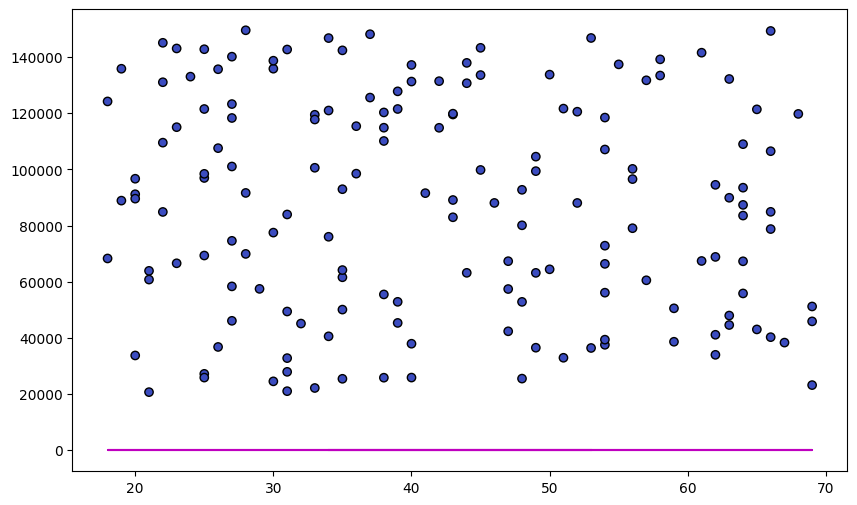

In [9]:
plt.figure(figsize=[10,6])
plt.scatter(x_test["Age"],x_test["EstimatedSalary"],c=pre,cmap="coolwarm",edgecolors="k")
plt.plot(x_test["Age"],pre,color="m")
plt.show()

In [10]:
new=pd.DataFrame({
    "Gender":label.fit_transform(["Male"]),
    "Age":[58],
    "Tenure":[3],
    "Balance":[73819.57],
    "NumOfProducts":[1],
    "HasCrCard":[0],
    "IsActiveMember":[0],
    "EstimatedSalary":[36770.95]

})
p=model.predict(new)
p

array([0])